In [1]:
import scanpy as sc
from scanpy.tools._ingest import Ingest, ingest

In [2]:
sc.set_figure_params(frameon=False)

In [3]:
pbmc = sc.datasets.pbmc68k_reduced()

In [4]:
n_split = 400

In [5]:
adata_ref = sc.AnnData(pbmc.X[:n_split, :], obs=pbmc.obs.iloc[:n_split])
adata_new = sc.AnnData(pbmc.X[n_split:, :])

C:\Miniconda3\envs\work\lib\site-packages\sklearn\metrics\pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


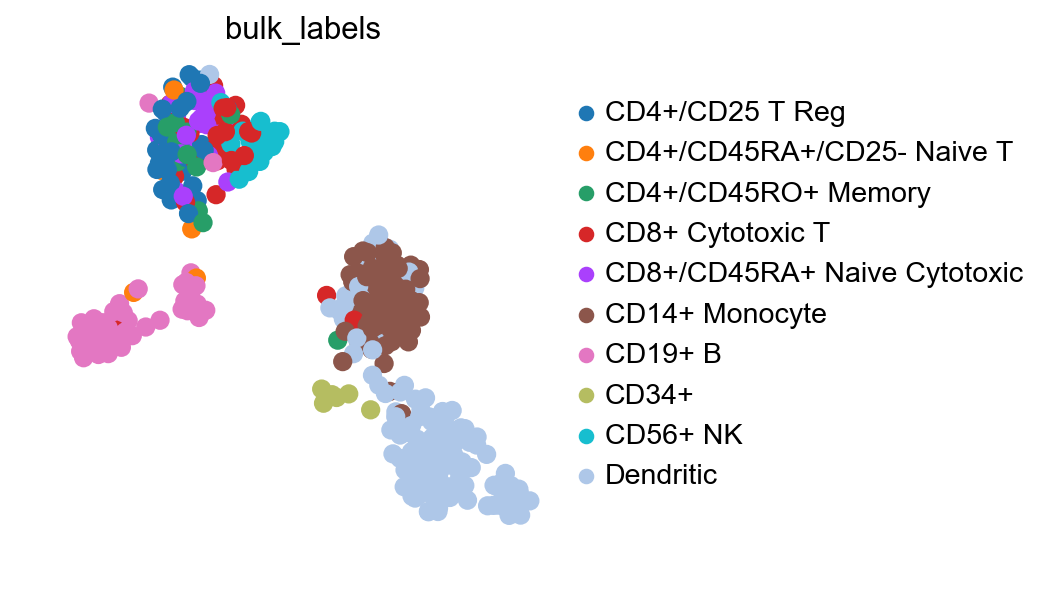

In [6]:
sc.pp.pca(adata_ref)
sc.pp.neighbors(adata_ref)
sc.tl.umap(adata_ref)
sc.pl.umap(adata_ref, color='bulk_labels')

In [7]:
ing = Ingest(adata_ref)

In [8]:
ing.transform(adata_new)

In [9]:
ing.map_embedding(method='umap')

In [10]:
ing.neighbors()

In [11]:
ing.map_labels('bulk_labels', method='knn')

In [12]:
adata_lab = ing.to_adata()

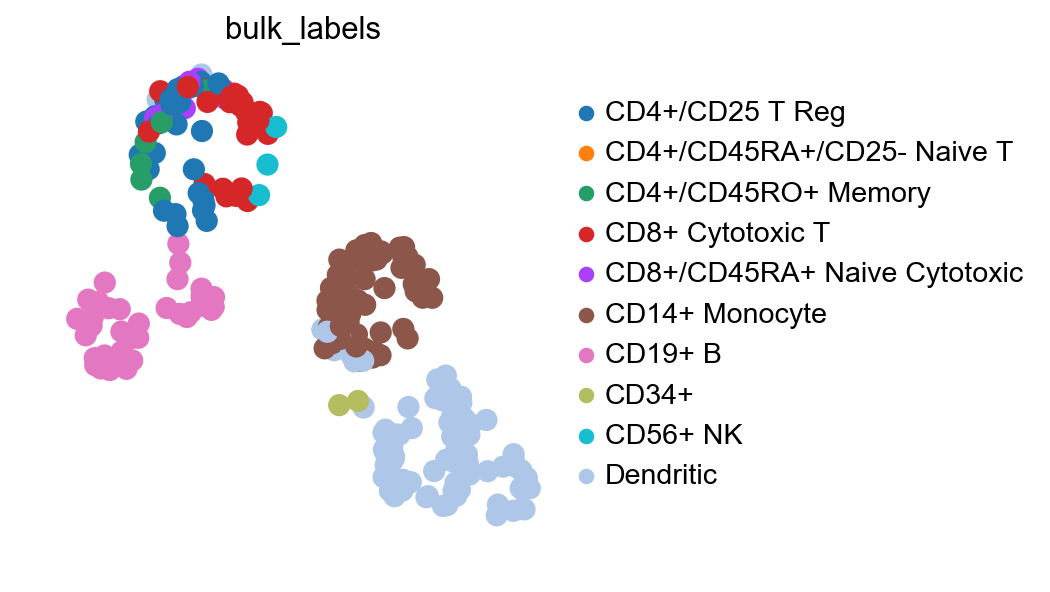

In [14]:
sc.pl.umap(adata_lab, color='bulk_labels')

## Or the compact way using the function

In [15]:
ingest(adata_new, adata_ref, obs='bulk_labels', embedding_method='umap', labeling_method='knn')
# same as ingest(adata_new, adata_ref, 'bulk_labels')

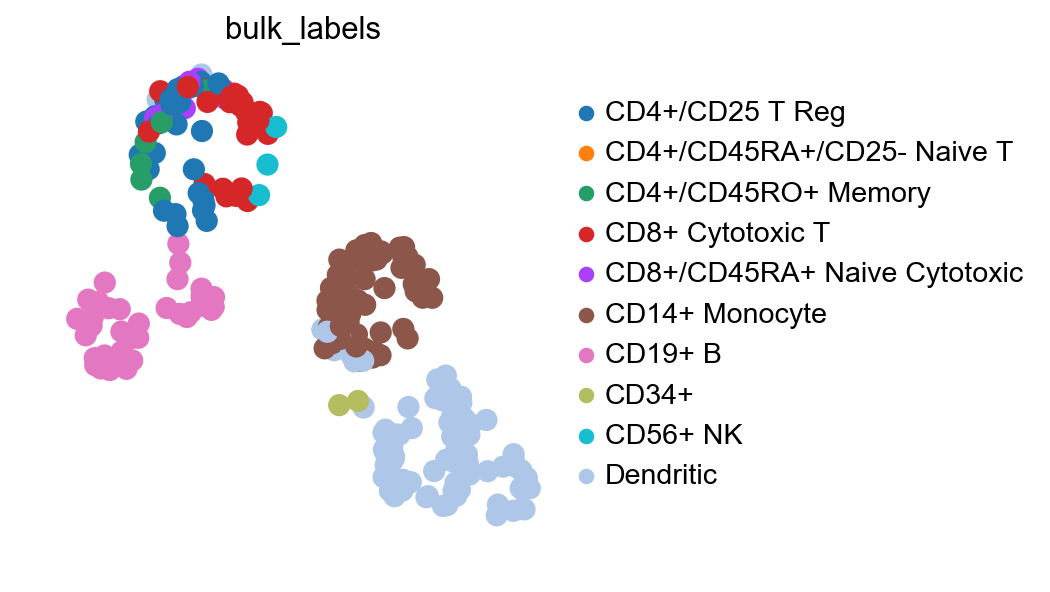

In [16]:
sc.pl.umap(adata_new, color='bulk_labels')

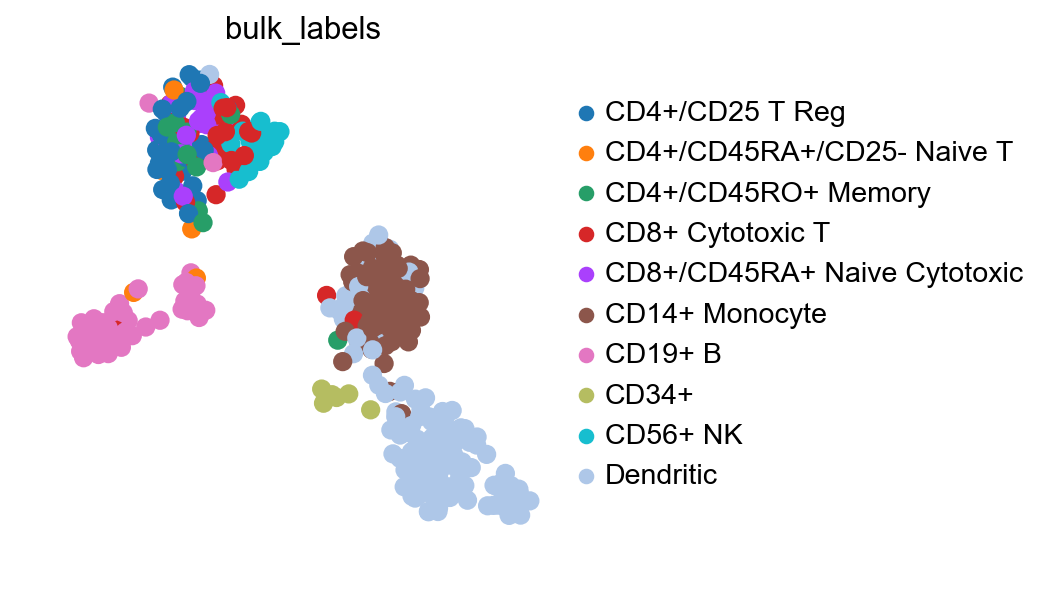

In [17]:
sc.pl.umap(adata_ref, color='bulk_labels')